# Methods to find the best K-Value


https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/

https://scikit-learn.org/stable/modules/clustering.html

https://scikit-learn.org/1.5/auto_examples/manifold/plot_t_sne_perplexity.html

https://distill.pub/2016/misread-tsne/


## Elbow Method




Step-by-Step Explanation of the Elbow Method

  1. Fit the K-means Model for Different Values of K: Run K-means clustering on the dataset for a range of K values (e.g., from 1 to 10).

  2. Calculate the Sum of Squared Distances (Inertia): For each K value, calculate the sum of squared distances between each point and the centroid of the cluster to which it belongs. This is also known as the within-cluster sum of squares (WCSS) or inertia.

  3. Plot the WCSS vs. Number of Clusters: Create a line plot with the number of clusters (K) on the x-axis and the WCSS on the y-axis.

  4. Identify the Elbow Point: The "elbow" point in the plot is where the WCSS starts to diminish at a slower rate. This point indicates the optimal number of clusters, where adding another cluster doesn't give much better modeling of the data.

### Why It Works
The idea behind the Elbow method is that as we increase the number of clusters, the WCSS decreases. Initially, the WCSS drops sharply because adding more clusters allows the data points to be closer to their centroids. However, after a certain point, the marginal gain in reducing WCSS diminishes, indicating that adding more clusters doesn't significantly improve the model. This point of inflection is the elbow point.

### Pros
* **Simplicity and Intuition:**
The Elbow Method is straightforward and easy to understand. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for an "elbow" point where the rate of decrease sharply slows down.
  
* **Visual Insight:**
The method provides a clear visual representation of the variance explained as a function of the number of clusters. This can help intuitively decide the optimal number of clusters.

* **Effective for Small to Medium Datasets:**
It works well for small to medium-sized datasets where visual inspection is feasible and effective.

* **Not Computation-Intensive:**
Compared to other methods, it is less computation-intensive, making it suitable for quick assessments.

###Cons
  
* **Subjectivity:**
Determining the "elbow" point can be subjective. Different people might interpret the plot differently, leading to varying choices for the number of clusters.

* **Not Always Clear:**
In some datasets, the plot does not exhibit a clear elbow. In such cases, the method becomes less reliable and might not provide a definitive answer.

*   **Scalability Issues:**
For very large datasets, computing the WCSS for different numbers of clusters can be computationally expensive.

* **Limited to Within-Cluster Variance:**
The Elbow Method focuses only on minimizing the within-cluster variance. It does not consider other aspects like the overall cluster structure or the distribution of data points.

* **Assumes K-means Assumptions:**
It assumes that K-means is the appropriate clustering method and that the clusters are roughly spherical and equally sized, which may not always be the case.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

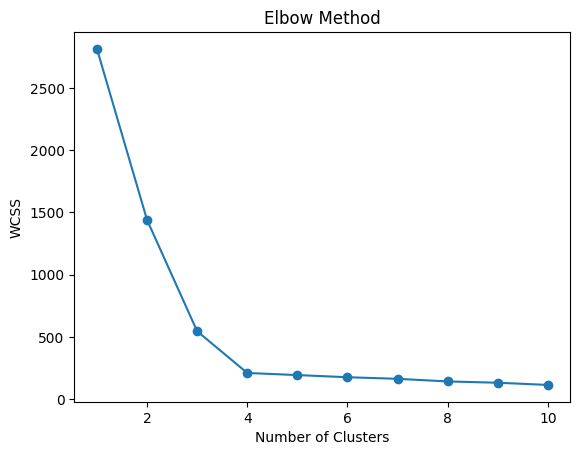

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Calculate WCSS for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs. number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher score indicates better-defined clusters.

For each sample:

  1. Compute the average distance to all other points in the same cluster (a).
  2. Compute the average distance to the centroid of the nearest cluster (b).
  3. The silhouette score for a sample is (b - a) / max(a, b).

### Pros:
* Provides a clear metric to evaluate the quality of clusters.
* Can handle different cluster shapes.
### Cons:
* Computationally expensive, especially for large datasets.
* May not work well if clusters are of varying density or size.

## Silhouette Score

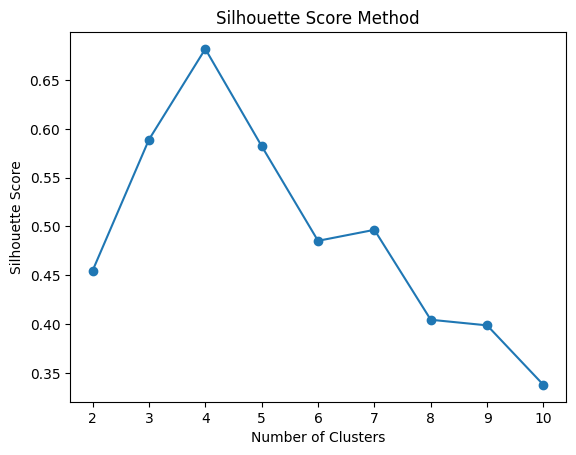

In [2]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for different values of K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Davies-Bouldin Index



The Davies-Bouldin Index evaluates clustering quality based on the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin index indicates better clustering.

Step2:
  1. Compute the average distance between each point in a cluster and the cluster centroid.
  2. Compute the distance between cluster centroids.
  3. Calculate the Davies-Bouldin index for each cluster and average them.

### Pros:
  * Simple to calculate.
  * Provides a relative measure of cluster quality.
### Cons:
  * Sensitive to noise and outliers.
  * May not work well with clusters of varying shapes and sizes.

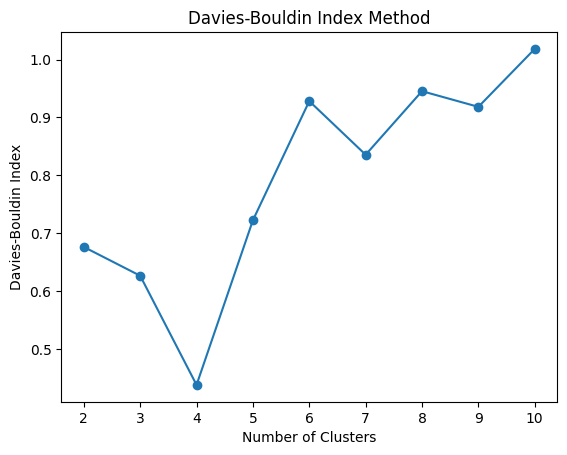

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin index for different values of K
davies_bouldin_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    db_score = davies_bouldin_score(X, cluster_labels)
    davies_bouldin_scores.append(db_score)

# Plot Davies-Bouldin index
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

Another methods to find the best K-Value are *Gap Statistic* and *Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC)*

# Example

In [3]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of students
n_students = 10

# Generate random data
student_ids = np.array(['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10'])
ages = np.array([18, 18, 23, 20, 22, 19, 20, 21, 19, 47])
mark1 = np.array([73, 79, 70, 55, 85, 91, 70, 53, 82, 75])
mark2 = np.array([75, 85, 70, 55, 86, 90 ,65 ,56, 82, 76])
mark3 = np.array([57, 75, 52, 55, 87, 89, 60, 59, 60, 77])

# Create DataFrame
students_df = pd.DataFrame({
    'Student_ID': student_ids,
    'Age': ages,
    'Mark 1': mark1,
    'Mark 2': mark2,
    'Mark 3': mark3
})

# Display the DataFrame
students_df


,Student_ID,Age,Mark 1,Mark 2,Mark 3
0,s01,18,73,75,57
1,s02,18,79,85,75
2,s03,23,70,70,52
3,s04,20,55,55,55
4,s05,22,85,86,87
5,s06,19,91,90,89
6,s07,20,70,65,60
7,s08,21,53,56,59
8,s09,19,82,82,60
9,s10,47,75,76,77


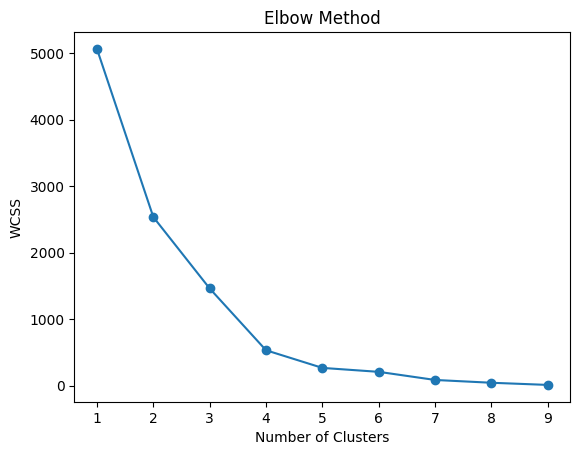

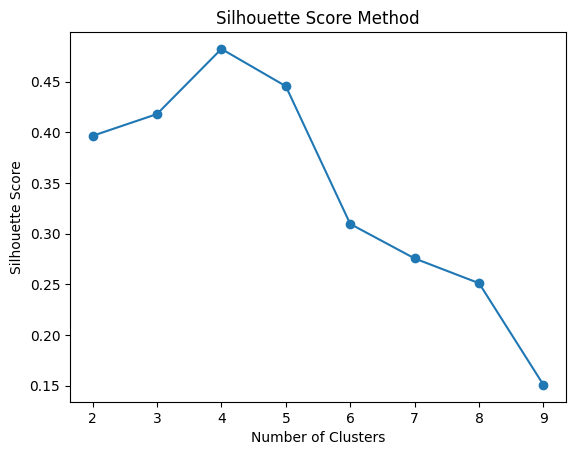

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

X = students_df[['Age', 'Mark 1', 'Mark 2', 'Mark 3']]

# Calculate WCSS for different values of K
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the WCSS vs. number of clusters
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [5]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=0)

kmeans.fit(X)

# Getting the cluster labels for each data point
labels = kmeans.labels_

# Organize data points by cluster
clusters = {}
for i in range(k):
    clusters[i] = students_df[labels == i]


# Print data elements of each cluster
for cluster, data in clusters.items():
    print(f"Cluster {cluster}:")
    print(data)
    print()  # Adds a newline for better readability between clusters

# Add cluster labels to the DataFrame
students_df['group'] = kmeans.labels_

Cluster 0:
  Student_ID  Age  Mark 1  Mark 2  Mark 3
1        s02   18      79      85      75
4        s05   22      85      86      87
5        s06   19      91      90      89

Cluster 1:
  Student_ID  Age  Mark 1  Mark 2  Mark 3
0        s01   18      73      75      57
2        s03   23      70      70      52
6        s07   20      70      65      60
8        s09   19      82      82      60

Cluster 2:
  Student_ID  Age  Mark 1  Mark 2  Mark 3
9        s10   47      75      76      77

Cluster 3:
  Student_ID  Age  Mark 1  Mark 2  Mark 3
3        s04   20      55      55      55
7        s08   21      53      56      59



In [9]:
kmeans.predict([['23', '65', '80', '46']])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [6]:
students_df

,Student_ID,Age,Mark 1,Mark 2,Mark 3,group
0,s01,18,73,75,57,1
1,s02,18,79,85,75,0
2,s03,23,70,70,52,1
3,s04,20,55,55,55,3
4,s05,22,85,86,87,0
5,s06,19,91,90,89,0
6,s07,20,70,65,60,1
7,s08,21,53,56,59,3
8,s09,19,82,82,60,1
9,s10,47,75,76,77,2


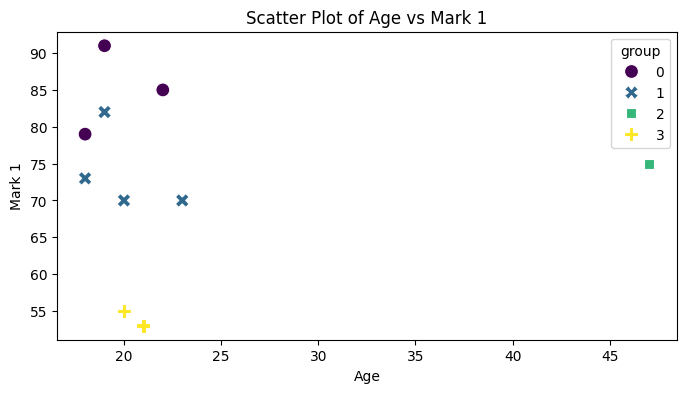

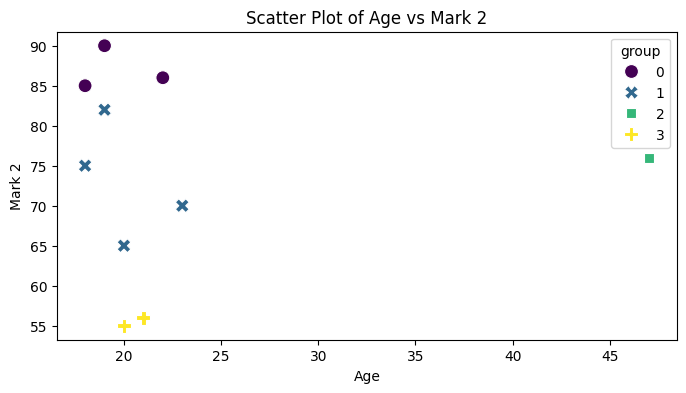

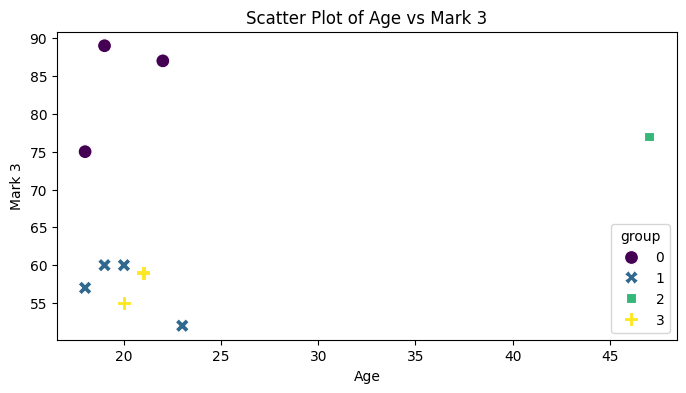

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for two features with clusters shown
def plot_features(x, y, data, groups, title):
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=x, y=y, hue=groups, data=data, palette='viridis', style=groups, s=100)
    plt.title(title)
    plt.legend(title='group')
    plt.show()

# Plot Age vs Mark 1
plot_features('Age', 'Mark 1', students_df, 'group', 'Scatter Plot of Age vs Mark 1')

# Plot Age vs Mark 2
plot_features('Age', 'Mark 2', students_df, 'group', 'Scatter Plot of Age vs Mark 2')

# Plot Age vs Mark 3
plot_features('Age', 'Mark 3', students_df, 'group', 'Scatter Plot of Age vs Mark 3')

plt.suptitle('Pairplot of Students Data Showing Different Groups', y=1.02)  # Adjust title position
plt.show()


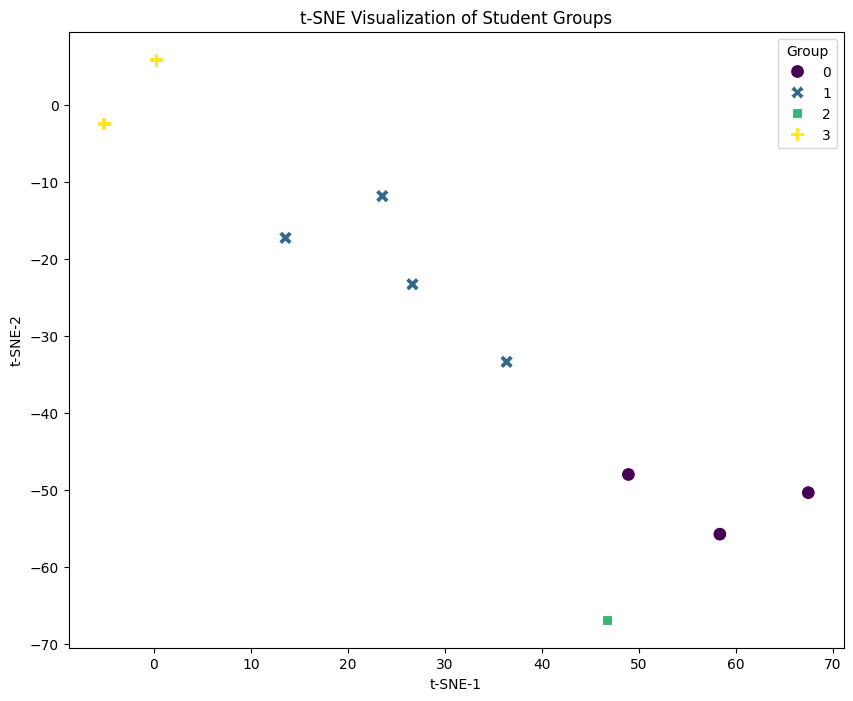

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=3)  # Using 2 components for a 2D visualization
X_tsne = tsne.fit_transform(X)

# Add t-SNE results to dataframe
students_df['t-SNE-1'] = X_tsne[:, 0]
students_df['t-SNE-2'] = X_tsne[:, 1]

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE-1', y='t-SNE-2', hue='group', data=students_df, palette='viridis', style='group', s=100)
plt.title('t-SNE Visualization of Student Groups')
plt.legend(title='Group')
plt.show()
